In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as  sns

In [3]:
uber=pd.read_csv(r"C:\Users\User\Desktop\pydata\uber dataset.csv")

In [4]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
#quick data inspection
uber.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,3/23/2024,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/29/2024,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,8/23/2024,8:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,10/21/2024,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,9/16/2024,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [14]:
pd.options.display.max_columns=100

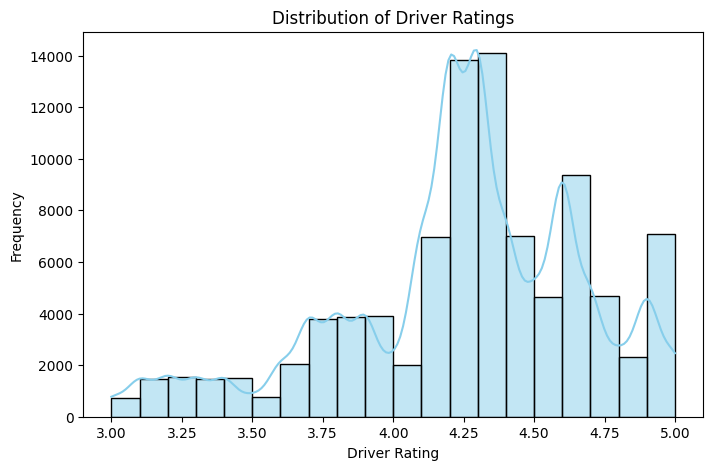

In [ ]:
#Driver ratings distribution-univariate analysis
plt.figure(figsize=(8,5)) #sets the size of the plot
sns.histplot(uber["Driver Ratings"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Distribution of Driver Ratings")
plt.xlabel("Driver Rating")
plt.ylabel("Frequency")
plt.show()

The analysis of driver ratings reveals a distribution that is heavily skewed toward the higher end, concentrated between 4.0 and 5.0.This suggests that most drivers consistently receive positive feedback. While  ratings below 4.0 are present ,their low frequency relative to the higher scores confirm a strfong overall performance.

In [16]:
#Average overall customer and driver rating

avg_customer_rating = uber["Customer Rating"].mean()
avg_driver_rating = uber["Driver Ratings"].mean()

print(f"Average Customer Rating: {avg_customer_rating:.2f}")
print(f"Average Driver Rating: {avg_driver_rating:.2f}")


Average Customer Rating: 4.40
Average Driver Rating: 4.23


On average, customers gave drivers a rating of 4.40, while drivers rated customers at 4.23. This suggests that customers are generally satisfied with the ride experience and tend to rate more positively. However, drivers are slightly more critical, indicating potential challenges they face during rides. Overall, both ratings are high, highlighting a strong culture of mutual respect and satisfaction within the Uber ecosystem.

In [ ]:
Overall distribution of ratings

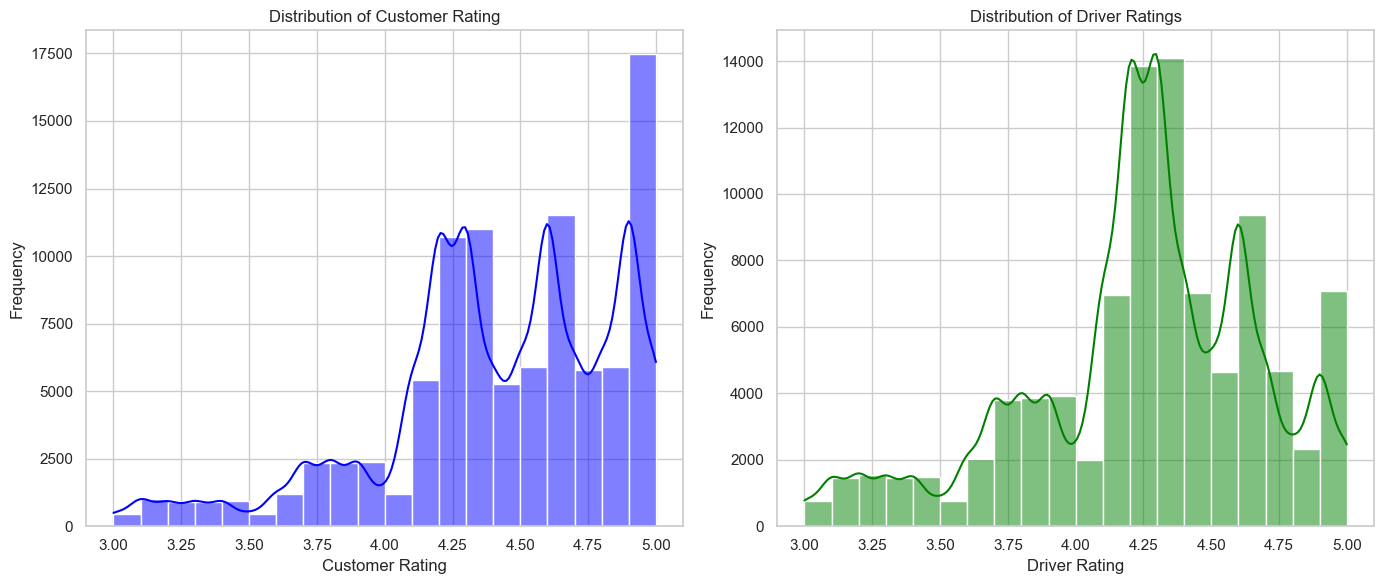

In [18]:
sns.set(style="whitegrid")

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Customer Ratings Distribution
sns.histplot(uber["Customer Rating"].dropna(), 
             bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Distribution of Customer Rating")
axes[0].set_xlabel("Customer Rating")
axes[0].set_ylabel("Frequency")

# Driver Ratings Distribution
sns.histplot(uber["Driver Ratings"].dropna(), 
             bins=20, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribution of Driver Ratings")
axes[1].set_xlabel("Driver Rating")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


Our analysis shows that while customers consistently give high satisfaction ratings, their ratings of drivers are more conservative, with a noticeable share in the mid-range. This suggests that improving driver-customer interactions could narrow this gap and further boost overall experience.

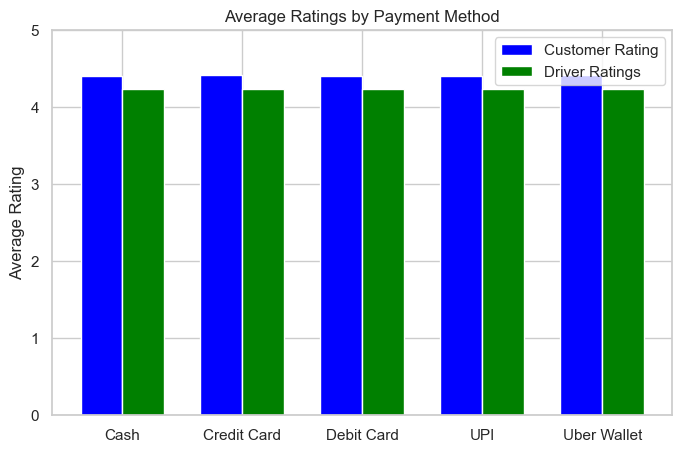

In [19]:
#Payment method vs rating
avg_ratings = uber.groupby("Payment Method")[["Customer Rating", "Driver Ratings"]].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(8,5))
bar_width = 0.35
x = range(len(avg_ratings))

plt.bar(x, avg_ratings["Customer Rating"], width=bar_width, label="Customer Rating", color="blue")
plt.bar([i + bar_width for i in x], avg_ratings["Driver Ratings"], width=bar_width, label="Driver Ratings", color="green")

# Add labels and formatting
plt.xticks([i + bar_width/2 for i in x], avg_ratings["Payment Method"])
plt.ylabel("Average Rating")
plt.title("Average Ratings by Payment Method")
plt.ylim(0, 5)  # ratings are between 0 and 5
plt.legend()
plt.show()

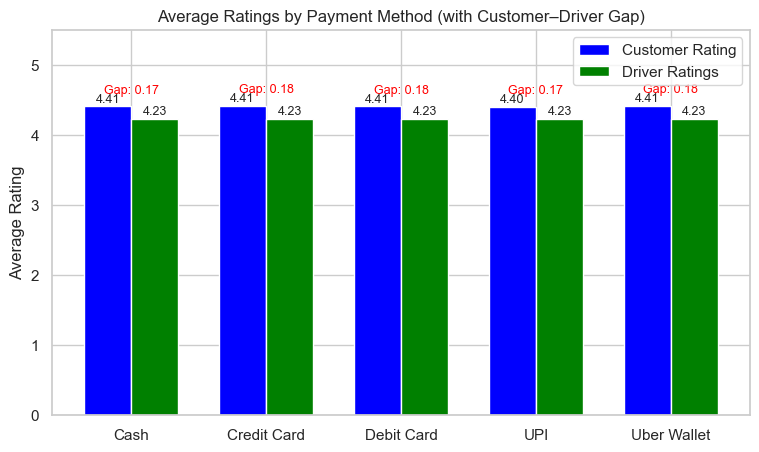

In [ ]:
#set up and data aggregation
avg_ratings = uber.groupby("Payment Method")[["Customer Rating", "Driver Ratings"]].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(9,5))
bar_width = 0.35
x = range(len(avg_ratings))

bars1 = plt.bar(x, avg_ratings["Customer Rating"], width=bar_width, label="Customer Rating", color="blue")
bars2 = plt.bar([i + bar_width for i in x], avg_ratings["Driver Ratings"], width=bar_width, label="Driver Ratings", color="green")

# Add exact values on top of bars
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=9)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=9)

# Add difference (gap) labels
for i in range(len(avg_ratings)):
    gap = avg_ratings["Customer Rating"].iloc[i] - avg_ratings["Driver Ratings"].iloc[i]
    plt.text(i + bar_width/2, max(avg_ratings["Customer Rating"].iloc[i], avg_ratings["Driver Ratings"].iloc[i]) + 0.15,
             f"Gap: {gap:.2f}", ha="center", va="bottom", fontsize=9, color="red")

# Formatting
plt.xticks([i + bar_width/2 for i in x], avg_ratings["Payment Method"])
plt.ylabel("Average Rating")
plt.title("Average Ratings by Payment Method (with Customer–Driver Gap)")
plt.ylim(0, 5.5)
plt.legend()
plt.show()

Our analysis of ratings across different payment methods reveals a consistent trend: customer ratings are always higher than driver ratings, regardless of how the payment was made. While customers tend to rate their own experience favorably, their evaluations of drivers are more conservative, creating a visible gap between the two. This suggests that drivers are held to stricter standards, possibly due to factors such as punctuality, driving style, or communication. Interestingly, the gap persists across both cash and digital payment methods, indicating that the issue is not tied to how payments are made but to the driver–customer interaction itself. Addressing this perception gap through driver support, customer engagement, and service improvements could help narrow the gap and enhance overall satisfaction.

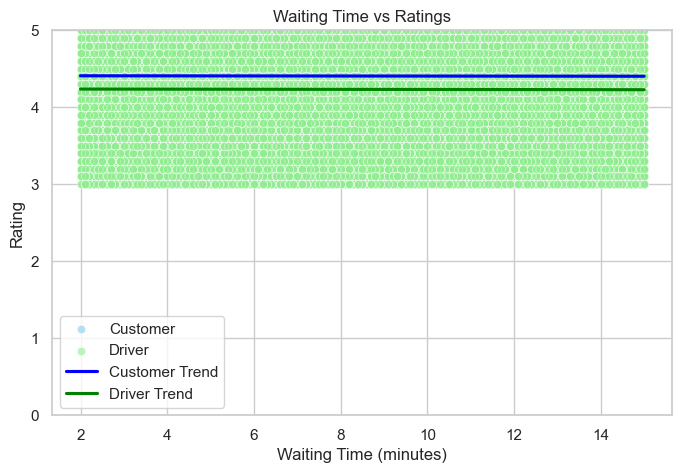

In [23]:
#waiting tgime vs rating
plt.figure(figsize=(8,5))
sns.scatterplot(data=uber, x="Avg VTAT", y="Customer Rating", alpha=0.6, color="skyblue", label="Customer")
sns.scatterplot(data=uber, x="Avg VTAT", y="Driver Ratings", alpha=0.6, color="lightgreen", label="Driver")
sns.regplot(data=uber, x="Avg VTAT", y="Customer Rating", scatter=False, color="blue", label="Customer Trend")
sns.regplot(data=uber, x="Avg VTAT", y="Driver Ratings", scatter=False, color="green", label="Driver Trend")

plt.title("Waiting Time vs Ratings")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.legend()
plt.show()

Data cleaning-convert date and time
Extract hour,weekday

In [ ]:
Introduce your audience to the dataset,no. of transactions,span of dataset,location of the data,find the demography,
median income,customer base
Introduce your problem statement,focus on rating, what is rating,it spans from 0-5,what each of this represents,
factors  contributing to ratings
The fraction of your dataset that gave ratings

Univariate analysis-get a count,mean,median and highest rating of the number of ratings,understanding ratings,ratings distribution
summary statistics-kde  plot,histogram.describe()
creating a sub dataframe for more analysis

Bivariate Analysis

-Time of day vs rating
Feature engineering
Time column;Group by hour,getting the mean & count rating per hour
Line chart. hour(time) against mean(rating); use a barchart
Heatmap;weekday against avg rating(seaborn)
What hours receive what number of ratings-we recedive ratings at x hour

-Location vs rating
Mentioning the unique no.of locations(pick up & drop offs)
Introduce a geometry column corresponding to the location provided
chloropeth;avg rating per area
bar plot(horizontal);ranking the highest 10
Add a line/marker within the bar plot for the avg rating
count of locations above tghe avg rating & below the avg rating

In [ ]:
payment method vs avg_ratings
groupby the payment method,mean+count of the rating
Bar chart;

Incomplete/complete rides vs rating
groupby,mean
barplot

vtat/ctat vs rating
scatterplot-vtat vs rating,ctat vs rating
pd.cut(bin the ctat &vtat times); groupby the bins;get the avg rating

Ride distance vs rating
